### 統計學習與深度學習 (Fall, 2020)
### Homework 1
### B06702064 會計四 林聖硯

### 第一題 [myknn_regressor]

#### Q1.1

In [54]:
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [55]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):

        self.n_neighbors = n_neighbors
        self.mean_type = mean_type
        
    def fit(self, x_train, y_train):
        
        self.x_train = x_train
        self.y_train = y_train
 
    def predict(self, x_test):

        #l2-distance, choose nearest neighbors
        preds = []
        for x in x_test:
            dists = self.l2_distance(x)
            #回傳從小到大的index
            sorted_idx = np.argsort(dists)
            knearest_labels = self.y_train[sorted_idx[:self.n_neighbors]]
            
            #remove outliers if k >= 10
            if self.mean_type == "remove_outliers" and self.n_neighbors >=10:
                Q1 = np.quantile(knearest_labels, 0.25)
                Q3 = np.quantile(knearest_labels, 0.75)
                IQR = Q3 - Q1
                knearest_labels = knearest_labels[(knearest_labels <= Q3 + 1.5 * IQR) & (knearest_labels >= Q1 - 1.5 * IQR)] 
            
            #compute means and round it to second decimal
            pred = np.mean(knearest_labels)           
            preds.append(pred)
            
        return np.array(preds)
    
    def l2_distance(self, x):
        return np.sum(np.square(self.x_train-x), axis=1)

#### Q1.2

In [21]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
Y_pred = myknn.predict(X_test)

In [22]:
RMSE = (np.sum(np.square(Y_pred - Y_test)) / len(Y_pred)) ** (1/2)
print("RMSE = ", RMSE)
print("First 20 predictions in the test data are", Y_pred[:20])

RMSE =  10.25126451549596
First 20 predictions in the test data are [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


#### Q1.3

In [23]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
Y_pred = myknn.predict(X_test)

In [24]:
RMSE = (np.sum(np.square(Y_pred - Y_test)) / len(Y_pred)) ** (1/2)
print("RMSE = ", RMSE)
print("First 20 predictions in the test data are", Y_pred[:20])

RMSE =  10.212572466080376
First 20 predictions in the test data are [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


### 第二題 [Tuning the Hyper-parameter]

#### Data Preprocessing

In [56]:
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train_scaling = xscaler.transform(msd_data['X_train'])
    X_test_scaling = xscaler.transform(msd_data['X_test'])
else:
    X_train_no_scaling = msd_data['X_train']
    X_test_no_scaling = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#scaling data
doscaling = 1

#no scaling data
doscaling = 0

#k
n_neighbors = [1, 2, 3, 4, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

#### Q2.1 (scaling + KNN)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt

In [45]:
RMSEs_1 = [] 
for neighbors in n_neighbors:
    neigh = KNeighborsRegressor(n_neighbors = neighbors)
    neigh.fit(X_train_scaling, Y_train)
    Y_pred = neigh.predict(X_test_scaling)
    RMSE = (np.sum(np.square(Y_pred - Y_test)) / len(Y_pred)) ** (1/2)
    RMSEs_1.append(RMSE)

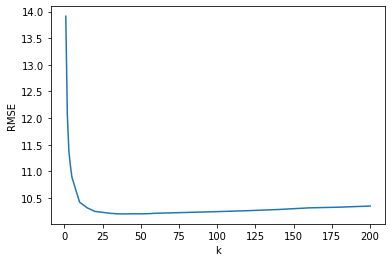

[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.425998912973919, 10.318171959828572, 10.25126451549596, 10.215977156359507, 10.205243203546763, 10.204332770527754, 10.207243171822855, 10.206033712139762, 10.208862384446808, 10.21700262724764, 10.231954198429056, 10.247295947386965, 10.264908458982783, 10.287098382403647, 10.317788599090449, 10.330995620176944, 10.351940397014143]


In [46]:
plt.plot(n_neighbors, RMSEs_1)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()
print(RMSEs_1)

#### Q2.2 (no scaling + KNN)

In [32]:
RMSEs_2 = [] 
for neighbors in n_neighbors:
    neigh = KNeighborsRegressor(n_neighbors = neighbors)
    neigh.fit(X_train_no_scaling, Y_train)
    Y_pred = neigh.predict(X_test_no_scaling)
    RMSE = (np.sum(np.square(Y_pred - Y_test)) / len(Y_pred)) ** (1/2)
    RMSEs_2.append(RMSE)

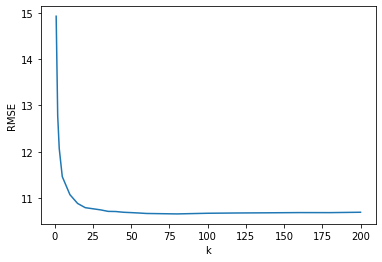

[14.923638966418345, 12.777499755429464, 12.075674967716129, 11.767805657810635, 11.466392632384432, 11.07746090040493, 10.888979137947995, 10.797788546734928, 10.75026561256701, 10.717738719772289, 10.714437504678756, 10.698494013475852, 10.69110105960404, 10.682608734124413, 10.672535729098724, 10.662907517124493, 10.67701950452466, 10.683139638996407, 10.687017556442052, 10.691630026202155, 10.69071978380711, 10.698853374700175]


In [33]:
plt.plot(n_neighbors, RMSEs_2)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()
print(RMSEs_2)

#### Q2.3 (scaling + myknn_regressor)

In [57]:
RMSEs_3 = []
for neighbors in n_neighbors:
    myknn = myknn_regressor(neighbors, "remove_outliers")
    myknn.fit(X_train_scaling, Y_train)
    Y_pred = myknn.predict(X_test_scaling)
    RMSE = (np.sum(np.square(Y_pred - Y_test)) / len(Y_pred)) ** (1/2)
    RMSEs_3.append(RMSE)

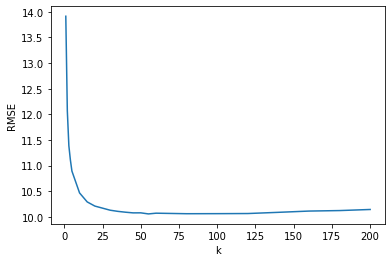

[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.468549209697088, 10.293424167991525, 10.212572466080376, 10.132105705172414, 10.109608004792985, 10.093231539122922, 10.080018891479627, 10.08078333324933, 10.059767600751963, 10.073857809066583, 10.063683549276588, 10.064917276737452, 10.067237203620246, 10.090646192390137, 10.115316675702928, 10.124987056716318, 10.146220720227745]


In [58]:
plt.plot(n_neighbors, RMSEs_3)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()
print(RMSEs_3)

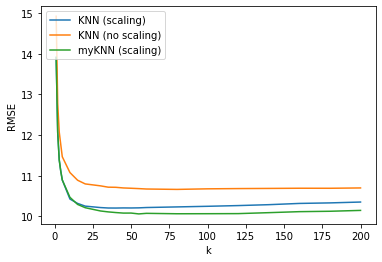

In [60]:
plt.plot(n_neighbors, RMSEs_1)
plt.plot(n_neighbors, RMSEs_2)
plt.plot(n_neighbors, RMSEs_3)
plt.legend(['KNN (scaling)', 'KNN (no scaling)', 'myKNN (scaling)'], loc='upper left')
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

#### Discussion
從上述的結果可以看出，在data有scaling的情況下，在調整參數的時候比較容易找到良好的k，但三個圖形呈現出來都不是一個良好的U-shape。從第二個情況可以看出k必須要重新挑，可能要在往更大的k找RMSE，因為K在15之後的RSME幾乎都是呈現一個平緩的情況。另外，比較第一和第三種情況，可以發現remove outliers在本題並沒有使結果預測得更準，K>20的部分RMSE和第一種情況差不多。

### 第三題 [Lasso Regression]

#### Q3.1

$$
\displaystyle L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]
$$

$\text{令} \displaystyle \mathbf{w} = [w_0, w_1, w_2, ..., w_M] ,   \mathbf{x}_i = [1, x_{i, 1}, x_{i, 2}, ..., x_{i, M}] \text{，並在此假設常數項的係數會被regularized (若不放入，則懲罰項由}j=1\text{開始})$
$$
\displaystyle L = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \mathbf{w^T} \mathbf{x_i})^2 + \lambda [\sum_{j=0}^{M} |w_j|]
$$

$$
\displaystyle  \frac{\partial L}{\partial w_j} = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \mathbf{w^T} \mathbf{x_i})(x_{i, j}) + \lambda \times sgn (w_j) 
$$


$\text{依照老師的notation，令}
\displaystyle \mathbf{w_{-j}} = [w_0, w_1, \dots, w_{j-1}, w_{j+1}, ..., w_M], (\mathbf{x}_i)_{-j} = [1, x_{i, 1}, \dots , x_{i, j-1}, x_{i, j+1}, \dots, x_{i, M}]$

並且以$\mathbf{\tilde w}$為起始值
$$
\begin{aligned}
\displaystyle \frac{\partial L}{\partial w_j} &= \frac{1}{n}  [\sum_{i=1}^{n} (y_i - (\mathbf{\tilde w_{-j}})^T(\mathbf{x}_i)_{-j}- w_j x_{i, j}) (-x_{i, j})] + \lambda \times sgn (w_j)
\\
\displaystyle &= \frac{1}{n}  [\sum_{i=1}^{n} (y_i - (\mathbf{\tilde w_{-j}})^T (\mathbf{x}_i)_{-j}(-x_{i, j})) + \frac{1}{n} w_j \sum_{i=1}^{n} x_{i, j}^2] + \lambda \times sgn (w_j) 
\\
&= 0
\end{aligned}
$$

令$\displaystyle \rho_j = \sum_{i = 1}^{n} x_{i, j} (y_i -  \mathbf{\tilde w_{-j}}^T (\mathbf{\tilde x}_i)_{-j}), z_j = \sum_{i=1}^{n} x_{i, j}^2$

$$
\begin{aligned}
\displaystyle \frac{\partial L}{\partial w_j} &= -\frac{1}{n} \rho_j + \frac{1}{n} w_j z_j+ \lambda sgn \times (w_j) = 0
\\
\displaystyle w_j &= \frac{\rho_j - n \times \lambda \times sgn(w_j)}{z_j}
\\
\displaystyle sgn(w_j)  &= \begin{cases}
1, \text{if  } w_j > 0 \text{  } (\rho_j > n \lambda)
\\
0, \text{if  } w_j = 0 \text{  } (-n \lambda < \rho_j < n \lambda)
\\
-1, \text{if  } w_j < 0 \text{  } ( \rho_j < - n \lambda)
\end{cases} 
\displaystyle  \text{                  for  } j = 0, \dots, M
\end{aligned}
$$



若無放入常數項，則

$$\displaystyle w_0 = \frac{\rho_0}{z_0}$$
又
$
\displaystyle x_{i,0} = 1 \text{  for  } i = 1, \dots, N, z_0 = \sum_{i=1}^{n} x_{i, 0}^2 = n $
$$
\begin{aligned}
\displaystyle \Rightarrow w_0 &= \frac{1}{n} \sum_{i = 1}^{n} (y_i -  \mathbf{\tilde w_{-0}}^T (\mathbf{\tilde x}_i)_{-0})
\\
w_j &= \frac{\rho_j - n \times \lambda \times sgn(w_j)}{z_j} 
\\
sgn(w_j)  &= \begin{cases}
1, \text{if  } w_j > 0 \text{  } (\rho_j > n \lambda)
\\
0, \text{if  } w_j = 0 \text{  } (-n \lambda < \rho_j < n \lambda)
\\
-1, \text{if  } w_j < 0 \text{  } ( \rho_j < - n \lambda) 
\end{cases}
\text{                  for  } j = 1, \dots, M
\end{aligned}
$$

#### Q3.2

In [58]:
import numpy as np

In [84]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        self.weights = None
        self.training_data = None
        self.loss = None
        self.RMSE = None
        self.MAE = None
        self.nonzero_weight = None
    
    #Create a function to get the output
    def predicted_values(self, X, w):
        '''
        X will be n x (d+1)
        w will be (d+1) x 1
        '''
        predictions = np.matmul(X,w) # n x 1
        return(predictions)
    
    def rho_compute(self, y, X, w, j):
        '''
        y is the response variable
        X is the predictor variables matrix
        w is the weight vector
        j is the feature selector
        '''
        X_k = np.delete(X, j, 1) #Remove the j variable i.e. j column
        w_k = np.delete(w, j) #Remove the weight j
        predict_k = self.predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:,j]*residual)
        return(rho_j)
    
    #computation for z_j
    def z_compute(self, X):
        z_vector = np.sum(X*X, axis = 0) #Compute sum for each column
        return(z_vector)
    
    def ridge_regression(self, x_train, y_train):
        l2_coef = 0.1
        #close-form solution for ridge regression
        w = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + l2_coef * np.eye(x_train.shape[1])), np.dot(x_train.T, y_train))
        return w 
    
    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        
        if keep_traindata == True:
            self.training_data = x_train
        
        step_sizes = 100
        iteration = 0
        
        #initial weights from ridge regression
        
        if winit == 'ridge':
            w = self.ridge_regression(x_train, y_train)
            
        #compute z_j
        z = self.z_compute(x_train)
        
        #break條件tol<L的改變幅度或遞迴次數超過max_iter
        while(step_sizes >= self.tol and iteration < self.max_iter):
            iteration += 1
            old_weights = np.copy(w)
            #compute old loss
            if self.const_regu == False:
                old_loss = (1/(2*len(y_train))) * np.sum(np.square(y_train - self.predicted_values(X_train, old_weights))) + self.lamcoef * (np.sum(np.abs(old_weights[1:])))
                
            else:
                new_loss = (1/(2*len(y_train))) * np.sum(np.square(y_train - self.predicted_values(X_train, w))) + self.lamcoef * (np.sum(np.abs(w)))
            for j in range(len(w)): #Take the number of features ie columns
                rho_j = self.rho_compute(y_train, x_train, w, j)
                if self.const_regu == False and j == 0:
                    w[0] = rho_j/z[0]
                elif rho_j < -self.lamcoef*len(y_train):
                    w[j] = (rho_j + (self.lamcoef*len(y_train)))/z[j]
                elif rho_j > -self.lamcoef*len(y_train) and rho_j < self.lamcoef*len(y_train):
                    w[j] = 0
                elif rho_j > self.lamcoef*len(y_train):
                    w[j] = (rho_j - (self.lamcoef*len(y_train)))/z[j]
                else:
                    w[j] = np.NaN
            
            if self.const_regu == False:
                new_loss = (1/(2*len(y_train))) * np.sum(np.square(y_train - self.predicted_values(X_train, w))) + self.lamcoef * (np.sum(np.abs(w[1:])))
                
            else:
                new_loss = (1/(2*len(y_train))) * np.sum(np.square(y_train - self.predicted_values(X_train, w))) + self.lamcoef * (np.sum(np.abs(w)))
     
            #L的改變幅度
            step_sizes = abs(new_loss - old_loss)

            if verbose == True:
                print("Iteration (start) : ",iteration)
                print("\nTraining loss\n", new_loss)
                print("\nOld Weights\n", old_weights)
                print("\nNew Weights\n",w)
                print("\nStep sizes\n",step_sizes)

        self.weights = w 
        self.loss = new_loss
        self.RMSE = (np.sum(np.square(y_train - self.predicted_values(x_train, w))) / len(y_train)) ** (1/2)
        self.MAE =  np.sum(np.abs(y_train - self.predicted_values(x_train, w))) / len(y_train)
        self.nonzero_weight = np.count_nonzero(w[1:])
        
    def predict(self, x_test):
        """Make prediction using trained model"""
        ### Add your code here ###
        y_pred = self.predicted_values(x_test, self.weights)
        return y_pred

#### Q3.3

In [85]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [86]:
X_train = np.column_stack((np.ones((X_train_sd.shape[0],1)),X_train_sd))
X_test = np.column_stack((np.ones((X_test_sd.shape[0],1)),X_test_sd))

In [87]:
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train)

In [88]:
print("Training Loss :", mlo.loss)
print("RMSE :", mlo.RMSE)
print("MAE :", mlo.MAE)
print("coefficient of intercept :", mlo.weights[0])
print("number of nonzero weights:", mlo.nonzero_weight)
print("other coefficients \n", mlo.weights[1:])

Training Loss : 49.88840410995362
RMSE : 9.719499089084625
MAE : 6.980898009625428
coefficient of intercept : 1998.266
number of nonzero weights: 59
other coefficients 
 [ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.0122

#### Q3.4

In [89]:
y_pred = mlo.predict(X_test)
pred_RMSE = (np.sum(np.square(Y_test - y_pred)) / len(Y_test)) ** (1/2)
pred_MAE =  np.sum(np.abs(Y_test - y_pred)) / len(Y_test)

In [90]:
print("first five predicted years :",y_pred[:5])
print("Test RMSE:", pred_RMSE)
print("Test MAE:", pred_MAE)

first five predicted years : [1991.93191145 1999.07198637 2001.76293602 1991.30317029 1994.42657933]
Test RMSE: 9.648414790970724
Test MAE: 6.921385961496769


#### Q3.5

In [110]:
lambda_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
training_loss = []
number_of_nonzero_weights = []
average_weight_size = []
training_RMSE = []
test_RMSE = []
for lambda_coef in lambda_list:
    mlo = mylasso(lamcoef = lambda_coef)
    mlo.fit(X_train, Y_train)
    
    #training loss
    training_loss.append(mlo.loss)
    
    #number_of_nonzero_weights
    number_of_nonzero_weights.append(mlo.nonzero_weight)
    
    #average_weight_size
    average_weight_size.append(np.mean(np.abs(mlo.weights[1:])))
    
    #training RMSE
    training_RMSE.append(mlo.RMSE)
    
    #testing RMSE
    y_pred = mlo.predict(X_test)
    test_RMSE.append((np.sum(np.square(Y_test - y_pred)) / len(Y_test)) ** (1/2))

In [111]:
from pandas.core.frame import DataFrame
dict_result = {"training loss": training_loss, "number of nonzero weights": number_of_nonzero_weights, "average weight size": average_weight_size, "training RMSE":training_RMSE, "testing RMSE": test_RMSE}
df_result = DataFrame(dict_result)
df_result.index = ['lambda = 0.0001', 'lambda = 0.0005', 'lambda = 0.001', 'lambda = 0.005', 'lambda = 0.01', 'lambda = 0.05', 'lambda = 0.1', 'lambda = 0.5', 'lambda = 1', 'lambda = 2'] 
print(df_result)

                 training loss  number of nonzero weights  \
lambda = 0.0001      46.570461                         90   
lambda = 0.0005      46.587378                         90   
lambda = 0.001       46.608460                         90   
lambda = 0.005       46.774656                         89   
lambda = 0.01        46.976826                         87   
lambda = 0.05        48.417390                         76   
lambda = 0.1         49.888404                         59   
lambda = 0.5         56.375688                         16   
lambda = 1           59.889324                          4   
lambda = 2           61.492131                          1   

                 average weight size  training RMSE  testing RMSE  
lambda = 0.0001             0.470577       9.650516      9.644354  
lambda = 0.0005             0.469495       9.650518      9.644084  
lambda = 0.001              0.467901       9.650528      9.643537  
lambda = 0.005              0.455753       9.650862     

In [112]:
from matplotlib import pyplot as plt

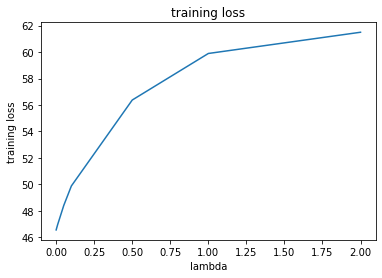

In [119]:
plt.plot(lambda_list, training_loss)
plt.title("training loss")
plt.xlabel("lambda")
plt.ylabel("training loss")
plt.show()

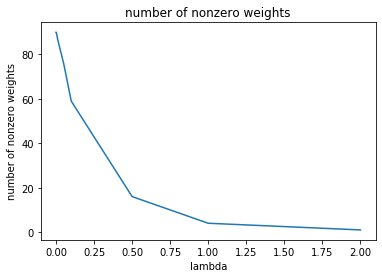

In [120]:
plt.plot(lambda_list, number_of_nonzero_weights)
plt.title("number of nonzero weights")
plt.xlabel("lambda")
plt.ylabel("number of nonzero weights")
plt.show()

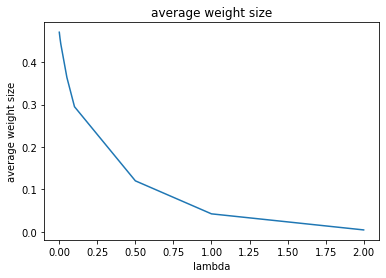

In [121]:
plt.plot(lambda_list, average_weight_size)
plt.title("average weight size")
plt.xlabel("lambda")
plt.ylabel("average weight size")
plt.show()

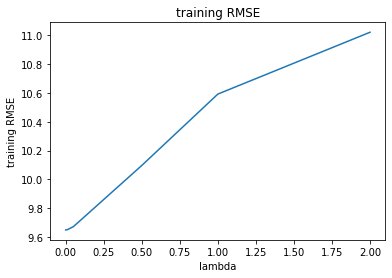

In [122]:
plt.plot(lambda_list, training_RMSE)
plt.title("training RMSE")
plt.xlabel("lambda")
plt.ylabel("training RMSE")
plt.show()

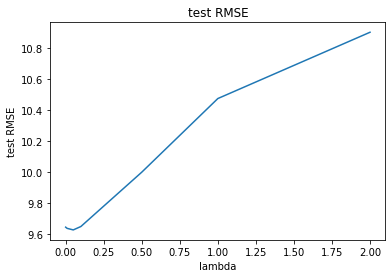

In [123]:
plt.plot(lambda_list, test_RMSE)
plt.title("test RMSE")
plt.xlabel("lambda")
plt.ylabel("test RMSE")
plt.show()

#### Discussion

可以發現當lambda上升時，各項loss和training的RMSE都會升高。
這是因為當lamcoef上升，feature weight較容易被設成0，故模型較難fit真實數據，所以loss會上升。
但在lambda在0到0.25的區間時，test RMSE呈現下降的狀態。